# Step-1 Importing libraries and Data Gathering

In [45]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np


In [46]:
df = pd.read_csv('C://Users//Yukta Gurnani//OneDrive//Desktop//intern//brs//all_kindle_review .csv')

# Step-2 Data Analysis

In [47]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,rating,unixReviewTime
count,12000.00000,12000.000000,12000.000000,1.200000e+04
mean,5999.50000,10024.275667,3.250000,1.344537e+09
std,3464.24595,10502.233123,1.421619,4.369374e+07
min,0.00000,0.000000,1.000000,9.602496e+08
25%,2999.75000,2999.750000,2.000000,1.316218e+09
50%,5999.50000,5999.500000,3.500000,1.356826e+09
75%,8999.25000,12475.750000,4.250000,1.376870e+09
max,11999.00000,47770.000000,5.000000,1.405814e+09


In [48]:
len(df['reviewText'])

12000

In [49]:
df

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [50]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

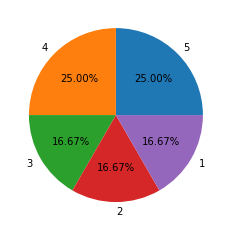

In [51]:
data=df['rating'].value_counts()
plt.pie(data,labels=data.index.tolist(),autopct='%.2f%%')
plt.show()

# Step-3 Data Cleaning

In [52]:
df.drop(['helpful','reviewTime','unixReviewTime'],axis=1,inplace=True)

In [53]:
df

,Unnamed: 0,Unnamed: 0.1,asin,rating,reviewText,reviewerID,reviewerName,summary
0,0,11539,B0033UV8HI,3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,Entertaining But Average
1,1,5957,B002HJV4DE,5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!
2,2,9146,B002ZG96I4,3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,Snapdragon Alley
3,3,7038,B002QHWOEU,3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,very light murder cozy
4,4,1776,B001A06VJ8,4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,Book
...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,4,Valentine cupid is a vampire- Jena and Ian ano...,A1OKS5Q1HD8WQC,lisa jon jung,jena
11996,11996,6272,B002JCSFSQ,5,I have read all seven books in this series. Ap...,AQRSPXLNEQAMA,TerryLP,Peacekeepers Series
11997,11997,12483,B0035N1V7K,3,This book really just wasn't my cuppa. The si...,A2T5QLT5VXOJAK,hwilson,a little creepy
11998,11998,3640,B001W1XT40,1,"tried to use it to charge my kindle, it didn't...",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work


# Step-4 Data Preprocessing

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['reviewerID'] = le.fit_transform(df['reviewerID'])
df

,Unnamed: 0,Unnamed: 0.1,asin,rating,reviewText,reviewerID,reviewerName,summary
0,0,11539,B0033UV8HI,3,"Jace Rankin may be short, but he's nothing to ...",5127,Ridley,Entertaining But Average
1,1,5957,B002HJV4DE,5,Great short read. I didn't want to put it dow...,3627,Holly Butler,Terrific menage scenes!
2,2,9146,B002ZG96I4,3,I'll start by saying this is the first of four...,5677,Merissa,Snapdragon Alley
3,3,7038,B002QHWOEU,3,Aggie is Angela Lansbury who carries pocketboo...,6347,Cleargrace,very light murder cozy
4,4,1776,B001A06VJ8,4,I did not expect this type of book to be in li...,4835,Rjostler,Book
...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,4,Valentine cupid is a vampire- Jena and Ian ano...,1440,lisa jon jung,jena
11996,11996,6272,B002JCSFSQ,5,I have read all seven books in this series. Ap...,7131,TerryLP,Peacekeepers Series
11997,11997,12483,B0035N1V7K,3,This book really just wasn't my cuppa. The si...,3722,hwilson,a little creepy
11998,11998,3640,B001W1XT40,1,"tried to use it to charge my kindle, it didn't...",2552,"Allison A. Slater ""Gryphon50""",didn't work


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['asin_num'] = le.fit_transform(df['asin'])
df

,Unnamed: 0,Unnamed: 0.1,asin,rating,reviewText,reviewerID,reviewerName,summary,asin_num
0,0,11539,B0033UV8HI,3,"Jace Rankin may be short, but he's nothing to ...",5127,Ridley,Entertaining But Average,925
1,1,5957,B002HJV4DE,5,Great short read. I didn't want to put it dow...,3627,Holly Butler,Terrific menage scenes!,491
2,2,9146,B002ZG96I4,3,I'll start by saying this is the first of four...,5677,Merissa,Snapdragon Alley,753
3,3,7038,B002QHWOEU,3,Aggie is Angela Lansbury who carries pocketboo...,6347,Cleargrace,very light murder cozy,586
4,4,1776,B001A06VJ8,4,I did not expect this type of book to be in li...,4835,Rjostler,Book,162
...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,4,Valentine cupid is a vampire- Jena and Ian ano...,1440,lisa jon jung,jena,198
11996,11996,6272,B002JCSFSQ,5,I have read all seven books in this series. Ap...,7131,TerryLP,Peacekeepers Series,514
11997,11997,12483,B0035N1V7K,3,This book really just wasn't my cuppa. The si...,3722,hwilson,a little creepy,977
11998,11998,3640,B001W1XT40,1,"tried to use it to charge my kindle, it didn't...",2552,"Allison A. Slater ""Gryphon50""",didn't work,310


# Step-5 Model Building

In [56]:
df_pivot = df.pivot_table(index='asin',columns='reviewerID',values='rating').fillna(0)
df_pivot

reviewerID,0,1,2,3,4,5,6,7,8,9,...,7604,7605,7606,7607,7608,7609,7610,7611,7612,7613
asin,,,,,,,,,,,,,,,,,,,,,
B000F83SZQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000FA64PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000FA64PK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000FA64QO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000FBFMVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B004NSV5DG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B004NSV8JC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B004NSVQ6M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 895)	5.0
  (0, 937)	5.0
  (0, 1590)	4.0
  (0, 3068)	4.0
  (0, 4894)	4.0
  (0, 5709)	4.0
  (0, 6075)	4.0
  (0, 6930)	4.0
  (1, 1762)	5.0
  (1, 2074)	5.0
  (1, 3577)	3.0
  (1, 4078)	4.0
  (1, 7145)	4.0
  (2, 1762)	5.0
  (2, 2074)	5.0
  (2, 2205)	4.0
  (2, 2895)	5.0
  (2, 3577)	5.0
  (2, 4615)	3.0
  (2, 5113)	5.0
  (2, 5727)	3.0
  (3, 1762)	5.0
  (3, 2074)	5.0
  (3, 2205)	3.0
  (3, 5727)	2.0
  :	:
  (2099, 1811)	1.0
  (2099, 7219)	1.0
  (2100, 4550)	1.0
  (2101, 361)	1.0
  (2101, 4527)	1.0
  (2101, 6679)	1.0
  (2102, 817)	1.0
  (2102, 2065)	1.0
  (2102, 5688)	1.0
  (2102, 7442)	1.0
  (2103, 1316)	1.0
  (2104, 1860)	1.0
  (2105, 6443)	1.0
  (2106, 1885)	1.0
  (2107, 3496)	1.0
  (2108, 519)	1.0
  (2109, 2144)	1.0
  (2109, 3270)	1.0
  (2110, 513)	1.0
  (2111, 2473)	1.0
  (2111, 4275)	1.0
  (2112, 2319)	1.0
  (2112, 3113)	1.0
  (2113, 4165)	1.0
  (2113, 6515)	1.0


In [58]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', n_neighbors=20, radius=2)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20, radius=2)

In [59]:
similarity_matrix = cosine_similarity(df_pivot)
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.54037357, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54037357, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Step-6 Recommendation

In [60]:
asin= input('Enter asin according to data set : ')
data = list(df_pivot.index) #shows list of ProductID in data-set
# print(data)

Enter asin according to data set : B0033UV8HI


In [61]:
query_index = data.index(asin) #shows index of productID by USER
print(query_index)

925


In [62]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)
similarity = np.round(similarity, decimals = 2)
print(similarity) #shows similarity distance through productID by USER
print(indices) #shows indexs of productID by USER

[[0.   0.73 0.78 0.95 1.   1.   1.   1.  ]]
[[ 925  744  492  720 1411 1409 1410 1408]]


In [63]:
i=df_pivot.index[indices.flatten()]
i

Index(['B0033UV8HI', 'B002YX0PL0', 'B002HJV4PM', 'B002XOTPWU', 'B003XKNG3W',
       'B003XDUEYI', 'B003XF1DXC', 'B003XCLV8C'],
      dtype='object', name='asin')

In [64]:
d=similarity.flatten()
d

array([0.  , 0.73, 0.78, 0.95, 1.  , 1.  , 1.  , 1.  ])

In [65]:
new=list(zip(i,d))
new

[('B0033UV8HI', 0.0),
 ('B002YX0PL0', 0.73),
 ('B002HJV4PM', 0.78),
 ('B002XOTPWU', 0.95),
 ('B003XKNG3W', 1.0),
 ('B003XDUEYI', 1.0),
 ('B003XF1DXC', 1.0),
 ('B003XCLV8C', 1.0)]

In [66]:
pd.DataFrame(new)

,0,1
0,B0033UV8HI,0.00
1,B002YX0PL0,0.73
2,B002HJV4PM,0.78
3,B002XOTPWU,0.95
4,B003XKNG3W,1.00
5,B003XDUEYI,1.00
6,B003XF1DXC,1.00
7,B003XCLV8C,1.00
